In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [102]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [5]:
df=pd.read_csv(r'C:\Drive E\FSDS AND AI\Date wise files\17102024\17th - NAIVE BAYES\project\adult.csv')

In [7]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [9]:
df.shape

(32561, 15)

In [9]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [9]:
col_names=['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
          'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df.columns=col_names

df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [11]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [19]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [13]:
categorical=[var for var in df.columns if df[var].dtype=='O']

print('there are {} categorical variables\n'.format(len(categorical)))

print('the categorical variables are :\n\n',categorical)

there are 9 categorical variables

the categorical variables are :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [17]:
df[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,?,HS-grad,Widowed,?,Not-in-family,White,Female,United-States,<=50K
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
2,?,Some-college,Widowed,?,Unmarried,Black,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K


In [15]:
df[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

In [17]:
for var in categorical:
    print(df[var].value_counts())

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64
marital_status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64
occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      

In [21]:
# view frequency distribution of categorical variables

for var in categorical:
    print(df[var].value_counts()/len(df))

workclass
Private             0.697030
Self-emp-not-inc    0.078038
Local-gov           0.064279
?                   0.056386
State-gov           0.039864
Self-emp-inc        0.034274
Federal-gov         0.029483
Without-pay         0.000430
Never-worked        0.000215
Name: count, dtype: float64
education
HS-grad         0.322502
Some-college    0.223918
Bachelors       0.164461
Masters         0.052916
Assoc-voc       0.042443
11th            0.036086
Assoc-acdm      0.032769
10th            0.028654
7th-8th         0.019840
Prof-school     0.017690
9th             0.015786
12th            0.013298
Doctorate       0.012684
5th-6th         0.010227
1st-4th         0.005160
Preschool       0.001566
Name: count, dtype: float64
marital_status
Married-civ-spouse       0.459937
Never-married            0.328092
Divorced                 0.136452
Separated                0.031479
Widowed                  0.030497
Married-spouse-absent    0.012837
Married-AF-spouse        0.000706
Name: coun

In [23]:
# check labels in workclass variable

df.workclass.unique()

array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [25]:
# check frequency distribution of values in workclass variable

df.workclass.value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [27]:
# replace '?' values in workclass variable with `NaN`

df['workclass'].replace('?',np.NaN,inplace=True)

In [29]:
# again check the frequency distribution of values in workclass variable

df['workclass'].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [33]:
# check labels in occupation variable

df.occupation.unique()

array(['?', 'Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv'], dtype=object)

In [35]:
# check frequency distribution of values in occupation variable

df['occupation'].value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [31]:
# replace '?' values in occupation variable with `NaN`

df['occupation'].replace('?',np.NaN,inplace=True)

In [33]:
# again check the frequency distribution of values in occupation variable

df['occupation'].value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [41]:
# check labels in native_country variable

df['native_country'].unique()

array(['United-States', '?', 'Mexico', 'Greece', 'Vietnam', 'China',
       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
       'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
       'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba',
       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
       'Haiti', 'El-Salvador', 'Hungary', 'Columbia', 'Guatemala',
       'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Scotland',
       'Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)'],
      dtype=object)

In [43]:
# check frequency distribution of values in native_country variable

df['native_country'].value_counts()

native_country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece       

In [35]:
# replace '?' values in native_country variable with `NaN`

df['native_country'].replace('?',np.NaN,inplace=True)

In [37]:
# again check the frequency distribution of values in native_country variable

df['native_country'].value_counts()

native_country
United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France       

In [39]:
df[categorical].isnull().sum()

workclass         1836
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
native_country     583
income               0
dtype: int64

In [41]:
# check for cardinality in categorical variables

for var in categorical:
    print(var,'contains',len(df[var].unique()),'labels')

workclass contains 9 labels
education contains 16 labels
marital_status contains 7 labels
occupation contains 15 labels
relationship contains 6 labels
race contains 5 labels
sex contains 2 labels
native_country contains 42 labels
income contains 2 labels


In [43]:
# find numerical variables

numerical=[var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :',numerical)


There are 6 numerical variables

The numerical variables are : ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [55]:
# view the numerical variables

df[numerical].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,90,77053,9,0,4356,40
1,82,132870,9,0,4356,18
2,66,186061,10,0,4356,40
3,54,140359,4,0,3900,40
4,41,264663,10,0,3900,40


In [45]:
# check missing values in numerical variables

df[numerical].isnull().sum()

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

In [47]:
X=df.drop(['income'],axis=1)

y=df['income']

In [49]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [51]:
# check the shape of X_train and X_test

X_train.shape,X_test.shape

((22792, 14), (9769, 14))

In [71]:
# check data types in X_train

X_train.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
dtype: object

In [53]:
# display categorical variables

categorical=[col for col in X_train.columns if X_train[col].dtype=='O']

categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [55]:
# display numerical variables

numerical=[col for col in X_train.columns if X_train[col].dtype!='O']

numerical

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [57]:
# print percentage of missing values in the categorical variables in training set

X_train[categorical].isnull().mean()

workclass         0.056774
education         0.000000
marital_status    0.000000
occupation        0.057038
relationship      0.000000
race              0.000000
sex               0.000000
native_country    0.018208
dtype: float64

In [59]:
# print categorical variables with missing data

for col in categorical:
    if(X_train[col].isnull().mean()>0):
        print(col,X_train[col].isnull().mean())

workclass 0.056774306774306775
occupation 0.057037557037557036
native_country 0.018208143208143207


In [61]:
# impute missing categorical variables with most frequent value

for df2 in [X_train,X_test]:
    df2['workclass'].fillna(X_train['workclass'].mode()[0],inplace=True)
    df2['occupation'].fillna(X_train['occupation'].mode()[0],inplace=True)
    df2['native_country'].fillna(X_train['native_country'].mode()[0],inplace=True)

In [63]:
# check missing values in categorical variables in X_train

X_train[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [73]:
# check missing values in categorical variables in X_test

X_test[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [75]:
# check missing values in X_train

X_train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

In [77]:
# check missing values in X_test

X_test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

In [65]:
# print categorical variables

categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [63]:
X_train[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
32098,State-gov,Bachelors,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States
25206,Local-gov,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
23491,Private,Some-college,Never-married,Exec-managerial,Not-in-family,White,Female,United-States
12367,Local-gov,HS-grad,Never-married,Farming-fishing,Own-child,White,Male,United-States
7054,Federal-gov,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States


In [67]:
# import category encoders

import category_encoders as ce

In [69]:
# encode remaining variables with one-hot encoding

encoder=ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship',
                              'race', 'sex', 'native_country'])

X_train=encoder.fit_transform(X_train)

X_test=encoder.transform(X_test)




In [71]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
32098,40,1,0,0,0,0,0,0,0,31627,...,0,0,0,0,0,0,0,0,0,0
25206,39,0,1,0,0,0,0,0,0,236391,...,0,0,0,0,0,0,0,0,0,0
23491,42,0,0,1,0,0,0,0,0,194710,...,0,0,0,0,0,0,0,0,0,0
12367,27,0,1,0,0,0,0,0,0,273929,...,0,0,0,0,0,0,0,0,0,0
7054,38,0,0,0,1,0,0,0,0,99527,...,0,0,0,0,0,0,0,0,0,0


In [91]:
X_train.shape

(22792, 106)

In [93]:
X_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41,native_country_42
22278,56,0,0,1,0,0,0,0,0,274475,...,0,0,0,0,0,0,0,0,0,0
8950,19,0,0,1,0,0,0,0,0,237455,...,0,0,0,0,0,0,0,0,0,0
7838,23,0,0,1,0,0,0,0,0,125491,...,0,0,0,0,0,0,0,0,0,0
16505,37,0,0,0,1,0,0,0,0,48779,...,0,0,0,0,0,0,0,0,0,0
19140,49,0,0,1,0,0,0,0,0,423222,...,0,0,0,0,0,0,0,0,0,0


In [95]:
X_test.shape

(9769, 106)

In [73]:
cols=X_train.columns

In [75]:
from sklearn.preprocessing import RobustScaler

scaler=RobustScaler()

X_train=scaler.fit_transform(X_train)

X_test=scaler.transform(X_test)

In [77]:
X_train=pd.DataFrame(X_train,columns=[cols])

X_test=pd.DataFrame(X_test,columns=[cols])

In [105]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41,native_country_42
0,0.15,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,-1.229248,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.10,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.483176,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.134601,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.50,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.797103,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.05,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,-0.661406,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
# train a Gaussian Naive Bayes classifier on the training set

from sklearn.naive_bayes import GaussianNB

# instantiate the model

gnb=GaussianNB()

# fit the model

gnb.fit(X_train,y_train)





GaussianNB()

In [81]:
y_pred=gnb.predict(X_test)

In [83]:
y_pred

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '>50K'],
      dtype='<U5')

In [85]:
from sklearn.metrics import accuracy_score

print('Training-set accuracy score: {0:0.4f}'.format(accuracy_score(y_test,y_pred)))

Training-set accuracy score: 0.8031


In [87]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(gnb.score(X_train,y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test,y_test)))

Training set score: 0.8009
Test set score: 0.8031


In [89]:
# check class distribution in test set

y_test.value_counts()

income
<=50K    7410
>50K     2359
Name: count, dtype: int64

In [91]:
# check null accuracy score

null_accuracy=7410/(7410+2359)

print('Null accuracy score: {:.4f}'.format(null_accuracy))

Null accuracy score: 0.7585


In [93]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred)

print('Confusion matrix \n\n',cm)

print('\n True Positives(TP) = ',cm[0,0])
print('\n True Negatives(TN) = ',cm[1,1])
print('\n False Positives(FP) = ',cm[0,1])
print('\n False Negatives(FN) = ',cm[1,0])



Confusion matrix 

 [[5953 1457]
 [ 467 1892]]

 True Positives(TP) =  5953

 True Negatives(TN) =  1892

 False Positives(FP) =  1457

 False Negatives(FN) =  467


<Axes: >

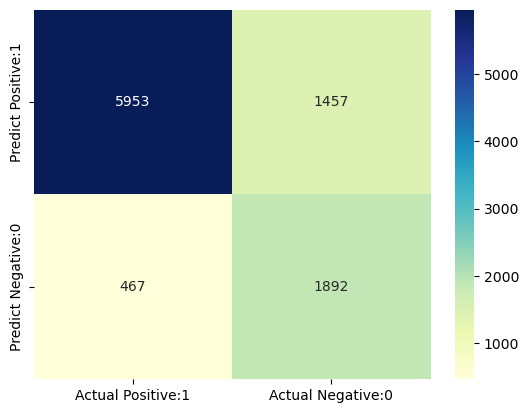

In [95]:
# visualize confusion matrix with seaborn heatmap

cm_matrix=pd.DataFrame(data=cm,columns=['Actual Positive:1', 'Actual Negative:0'],
                                index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix,annot=True,fmt='d',cmap='YlGnBu')

In [97]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       <=50K       0.93      0.80      0.86      7410
        >50K       0.56      0.80      0.66      2359

    accuracy                           0.80      9769
   macro avg       0.75      0.80      0.76      9769
weighted avg       0.84      0.80      0.81      9769



In [99]:
TP=cm[0,0]
TN=cm[1,1]
FP=cm[0,1]
FN=cm[1,0]

In [101]:
# print classification accuracy

classification_accuracy=(TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8031


In [103]:
# print classification error

classification_error=(FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {:.4f}'.format(classification_error))


Classification error : 0.1969


In [105]:
# print precision score

precision = TP / float(TP + FP)

print('Precision : {0:0.4f}'.format(precision))

Precision : 0.8034


In [107]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9273


In [109]:
false_positive_rate=FP/float(FP+TN)

print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.4351


In [111]:
specificity = TN / (TN + FP)

print('Specificity : {:.4f}'.format(specificity))

Specificity : 0.5649


In [113]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob=gnb.predict_proba(X_test)[0:10]

In [115]:
y_pred_prob

array([[9.99999693e-01, 3.06618197e-07],
       [1.00000000e+00, 1.02355439e-10],
       [9.99999997e-01, 3.02850706e-09],
       [8.78002299e-04, 9.99121998e-01],
       [7.55021219e-04, 9.99244979e-01],
       [9.99505992e-01, 4.94008099e-04],
       [9.99999697e-01, 3.03376335e-07],
       [9.63760637e-01, 3.62393626e-02],
       [9.99999937e-01, 6.31028512e-08],
       [1.41650243e-03, 9.98583498e-01]])

In [117]:
# store the probabilities in dataframe

y_pred_prob_df=pd.DataFrame(data=y_pred_prob,columns=['Prob of - <=50K', 'Prob of - >50K'])

y_pred_prob_df

,Prob of - <=50K,Prob of - >50K
0,1.000000,3.066182e-07
1,1.000000,1.023554e-10
2,1.000000,3.028507e-09
3,0.000878,9.991220e-01
4,0.000755,9.992450e-01
5,0.999506,4.940081e-04
6,1.000000,3.033763e-07
7,0.963761,3.623936e-02
8,1.000000,6.310285e-08
9,0.001417,9.985835e-01


In [119]:
# print the first 10 predicted probabilities for class 1 - Probability of >50K

gnb.predict_proba(X_test)[0:10,1]

array([3.06618197e-07, 1.02355439e-10, 3.02850706e-09, 9.99121998e-01,
       9.99244979e-01, 4.94008099e-04, 3.03376335e-07, 3.62393626e-02,
       6.31028512e-08, 9.98583498e-01])

In [121]:
# store the predicted probabilities for class 1 - Probability of >50K

y_pred1=gnb.predict_proba(X_test)[:,1]

Text(0, 0.5, 'Frequency')

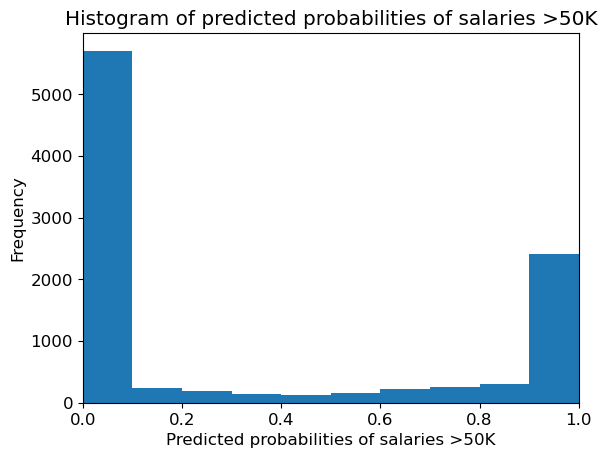

In [123]:
# plot histogram of predicted probabilities

# adjust the font size
plt.rcParams['font.size']=12

# plot histogram with 10 bins
plt.hist(y_pred1,bins=10)

# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of salaries >50K')

# set the x-axis limit
plt.xlim(0,1)

# set the title
plt.xlabel('Predicted probabilities of salaries >50K')
plt.ylabel('Frequency')

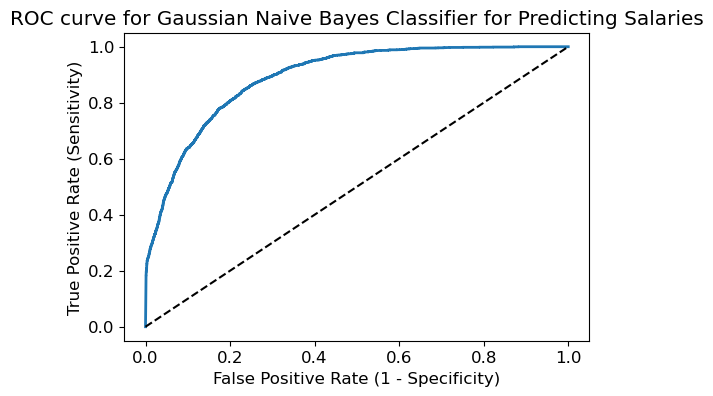

In [129]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr,tpr,thresholds=roc_curve(y_test,y_pred1,pos_label='>50K')

plt.figure(figsize=(6,4))

plt.plot(fpr,tpr,linewidth=2)

plt.plot([0,1],[0,1],'k--')

plt.rcParams['font.size']=12

plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Salaries')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [131]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC=roc_auc_score(y_test,y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8909


In [133]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores=cross_val_score(gnb,X_train,y_train,cv=10,scoring='accuracy')

print('Cross-validation scores: {}'.format(scores))

Cross-validation scores: [0.80701754 0.7877193  0.79947345 0.81439228 0.785871   0.81526986
 0.78894252 0.79420799 0.80122861 0.8056165 ]


In [135]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8000
